In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Sankey
from pyecharts import options as opts
import plotly.express as px

In [2]:
data=pd.read_csv('after_merge.csv')
data

,Unnamed: 0,State Abbreviation,Accident Severity in State,Number of Accidents in State,State,Customer,Customer Lifetime Value,Response,Coverage,Education,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,0,WA,2.305062,32554,Washington,BU79786,2763.519279,No,Basic,Bachelor,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,AZ,2.069553,56504,Arizona,QZ44356,6979.535903,No,Extended,Bachelor,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,NV,2.226077,6197,Nevada,AI49188,12887.431650,No,Premium,Bachelor,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,CA,2.041998,795868,California,WW63253,7645.861827,No,Basic,Bachelor,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,WA,2.305062,32554,Washington,HB64268,2813.692575,No,Basic,Bachelor,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,CA,2.041998,795868,California,LA72316,23405.987980,No,Basic,Bachelor,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,9130,CA,2.041998,795868,California,PK87824,3096.511217,Yes,Extended,College,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,9131,CA,2.041998,795868,California,TD14365,8163.890428,No,Extended,Bachelor,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,9132,CA,2.041998,795868,California,UP19263,7524.442436,No,Extended,College,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


Text(0.5, 1.0, 'user education distribution')

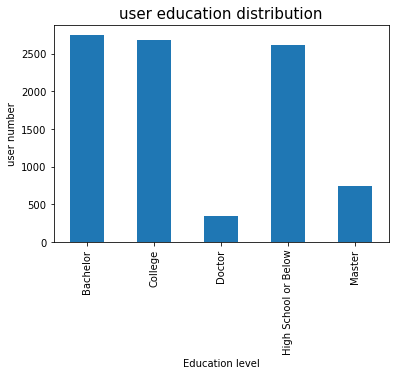

In [15]:
#education distribution
dfedu=data.groupby('Education')
dfedu.size().plot(kind='bar')
plt.xlabel("Education level")
plt.ylabel("user number")
plt.title("user education distribution",fontsize=15)

Text(0.5, 1.0, 'user income distribution')

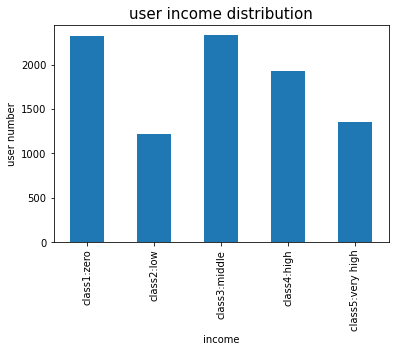

In [21]:
#income distribution
c1 = data['Income']==0
c2 = (data['Income']>0) & (data['Income']<25000)
c3 = (data['Income']>=25000) & (data['Income']<50000)
c4 = (data['Income']>=50000) & (data['Income']<75000)
c5 = data['Income']>=75000
data['Income_category'] = np.select([c1,c2,c3,c4], ['class1:zero','class2:low','class3:middle', 'class4:high'], default='class5:very high')
dfincome=data.groupby('Income_category')
dfincome.size().plot(kind='bar')
plt.xlabel("income")
plt.ylabel("user number")
plt.title("user income distribution",fontsize=15)

In [34]:
#user car
dfcar=data.groupby(['Vehicle Size','Vehicle Class' ])
dfcar=dfcar.size().to_frame().reset_index()
dfcar.columns=['Vehicle Size','Vehicle Class','Number']
dfcar

,Vehicle Size,Vehicle Class,Number
0,Large,Four-Door Car,475
1,Large,Luxury Car,16
2,Large,Luxury SUV,18
3,Large,SUV,167
4,Large,Sports Car,49
5,Large,Two-Door Car,221
6,Medsize,Four-Door Car,3237
7,Medsize,Luxury Car,106
8,Medsize,Luxury SUV,125
9,Medsize,SUV,1308


In [51]:
#car sankey chart
nodes = []
for i in range(2):
    values = dfcar.iloc[:,i].unique()
    for value in values:
        dic={}
        dic["name"]=value
        nodes.append(dic)

linkes=[]
for i in dfcar.values:
    dic={}
    dic["source"]=i[0]
    dic["target"]=i[1]
    dic["value"]=i[2]
    linkes.append(dic)

pic = Sankey().add("vehicel_num",nodes,linkes,
                   linestyle_opt=opts.LineStyleOpts(opacity=0.3,curve=0.5,color="source"),
                   label_opts=opts.LabelOpts(position="left"),
                   node_gap=30).set_global_opts(title_opts=opts.TitleOpts(title="Customer vehical distribution"))
pic.render_notebook()